# EDA

UCSD DSC180A FA20

Brandon Tsui

Xuanyu Wu

**Purpose of this notenook:** This notebook contains the initial assessments of the data before building the model.

**Note:** Anything beyond quantification had not yet been implemented.

## Quantification

First, we used Kallisto to perform pseudo-alignment and quantification on the fastq data. Kallisto outputs the abundance information of the sequence file, that is, how many of each target read there are in that file. Note that since Kallisto uses pseudo-alignment and bootstrap instead of actual alignment, the target counts are estimations.

A sample histogram of the estimated counts of targets in an abundance file looks like this:

Text(0.5, 0.98, 'histogram of estimated count in SRR3438556 (log scale)')

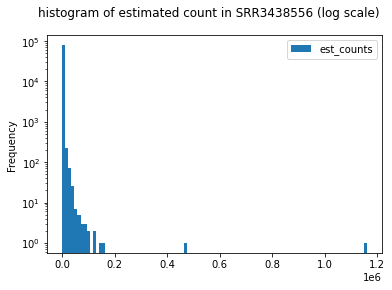

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_p = '../data/tmp/quant/SRR3438556/abundance.tsv'
df = pd.read_table(file_p)
cnts = df[['est_counts']]
cnts.plot.hist(bins=100, log=True)
plt.suptitle('histogram of estimated count in SRR3438556 (log scale)')

In [2]:
cnts.describe()

,est_counts
count,7.875100e+04
mean,4.097086e+02
std,4.974523e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.388440e+01
75%,1.313730e+02
max,1.159070e+06


We can see that the majority of target counts are within the range of 130. However, there are a few exceptions that have count as high as around one million. This unbalanced distribution can potentially influence future analysis. The next step is finding out what are the outlier targets and then determine whether we should exclude them.